In [ ]:
pip install gym matplotlib numpy


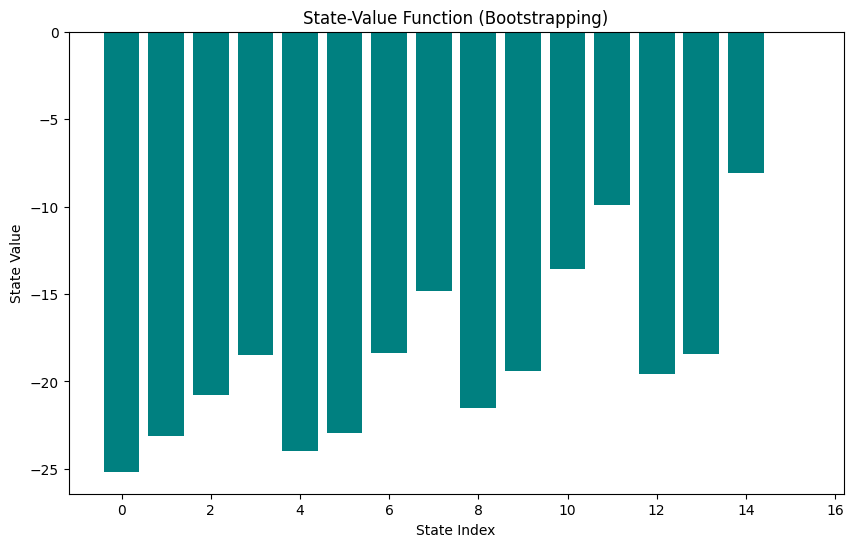

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Define GridWorld Environment (4x4 grid with rewards and terminal states)
class GridWorldEnv(gym.Env):
    def __init__(self):
        self.shape = (4, 4)  # 4x4 grid
        self.nS = np.prod(self.shape)  # Number of states
        self.nA = 4  # Actions: 0=Up, 1=Right, 2=Down, 3=Left
        self.action_space = gym.spaces.Discrete(self.nA)
        self.observation_space = gym.spaces.Discrete(self.nS)

        self.start_state = 0
        self.terminal_states = [0, 15]  # terminal states
        self.reset()

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        row, col = divmod(self.state, self.shape[1])
        if action == 0:  # Up
            row = max(row - 1, 0)
        elif action == 1:  # Right
            col = min(col + 1, self.shape[1] - 1)
        elif action == 2:  # Down
            row = min(row + 1, self.shape[0] - 1)
        elif action == 3:  # Left
            col = max(col - 1, 0)

        next_state = row * self.shape[1] + col
        reward = -1
        done = next_state in self.terminal_states
        self.state = next_state
        return next_state, reward, done, {}

# Temporal Difference (TD) Learning (Bootstrapping)
def td_learning(env, num_episodes, gamma=1.0, alpha=0.1):
    V = np.zeros(env.nS)  # Initialize state-value function
    for i_episode in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            # Select action randomly
            action = env.action_space.sample()
            next_state, reward, done, _ = env.step(action)

            # Update state-value function (bootstrapping step)
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

            state = next_state
    return V

# Bar Plot for State-Value Function Visualization
def plot_bar_state_values(V):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(V)), V, color='teal')
    plt.xlabel("State Index")
    plt.ylabel("State Value")
    plt.title("State-Value Function (Bootstrapping)")
    plt.show()

# Main Execution for Bootstrapping (TD(0) Learning)
env = GridWorldEnv()
V = td_learning(env, num_episodes=500)  # 500 episodes for learning
plot_bar_state_values(V)  # Plot state-values using bar plot


This graph represents the **state-value function** in a reinforcement learning (RL) context, specifically using a technique called **bootstrapping**. Here's what's happening in simple terms:

1. **State Index (X-axis):** Each number on the X-axis corresponds to a specific state in the environment. Think of these as different situations or positions the agent could be in.

2. **State Value (Y-axis):** The bars represent how valuable each state is for the agent. A higher bar means the state is more beneficial (or desirable), and a lower bar (further negative) means it's less beneficial (or undesirable).

3. **Bootstrapping:** This is a method used to estimate these state values by updating them based on the value of other states the agent has already experienced. Over time, the agent learns better estimates of the value of each state.

In this graph, most state values are negative, meaning the agent is in a challenging environment where states are generally less desirable. However, the specific variation in the heights of the bars shows that some states are slightly better (or less bad) than others.

### **Inference from the Graph:**

1. **Overall Negative State Values:**
   - The graph indicates that most states have negative values, suggesting the environment is generally unfavorable or that the agent incurs penalties in most states.

2. **State-wise Variations:**
   - Some states are less negative than others, implying they might be relatively more favorable or involve smaller penalties. This could indicate that the agent is learning to differentiate between worse and better states within the given environment.

3. **Effect of Bootstrapping:**
   - The uneven distribution of state values reflects the learning process via bootstrapping, where the agent updates the value of a state based on other states. The learning might still be in progress, as the values don't show a clear pattern or convergence yet.

4. **Insights for Agent's Strategy:**
   - The agent may focus on avoiding the states with the most negative values and attempt to reach the "less bad" states, depending on the dynamics of the environment and the actions available.

In summary, the graph reflects a learning environment where the agent is identifying and differentiating the relative values of states in an overall challenging scenario, likely progressing toward a strategy to minimize penalties or maximize rewards.


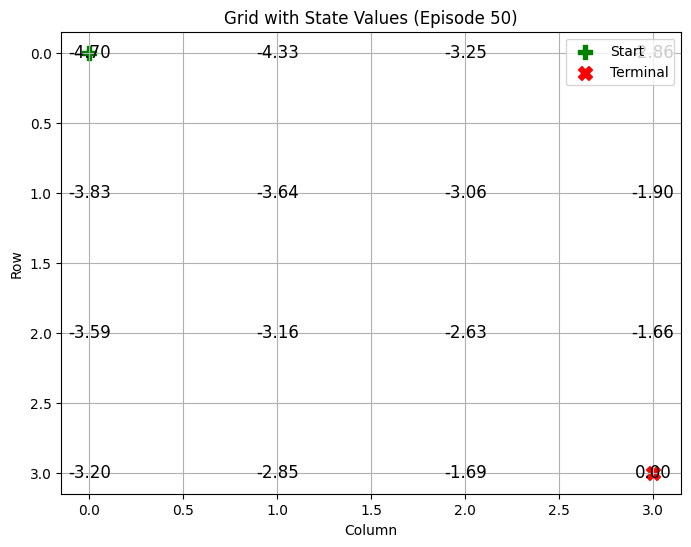

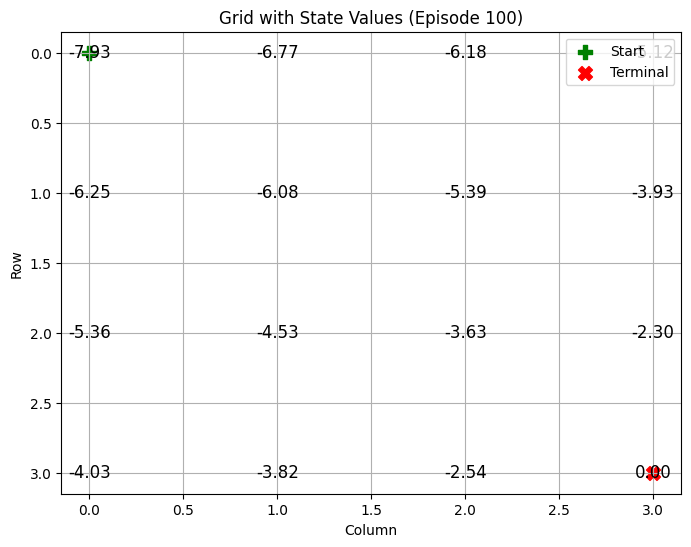

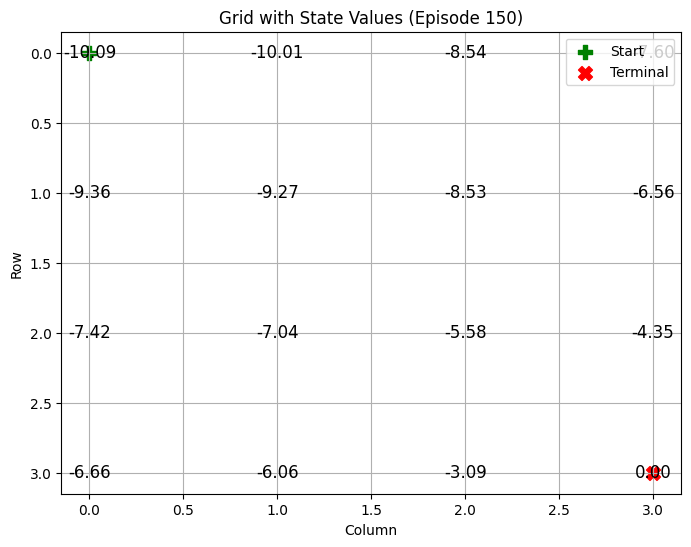

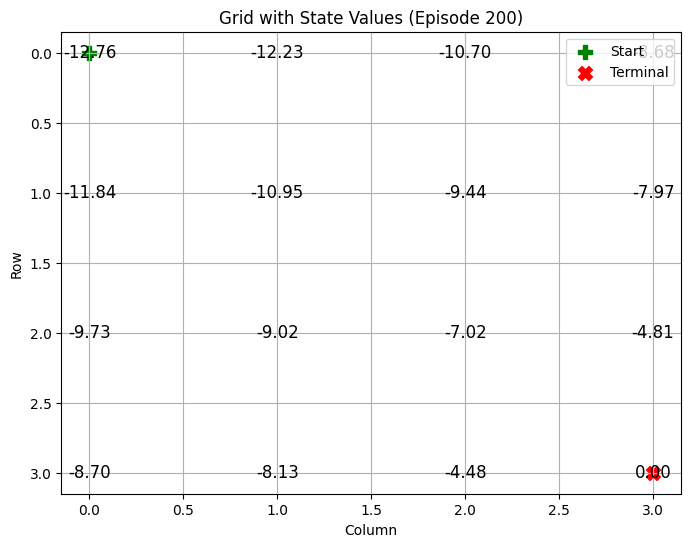

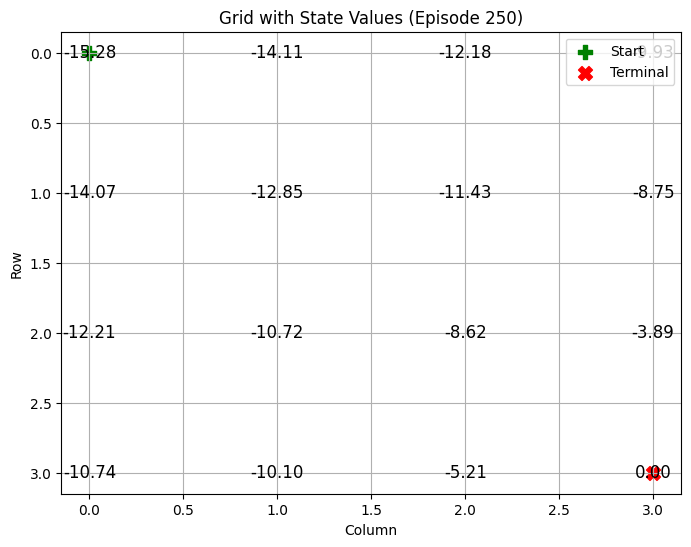

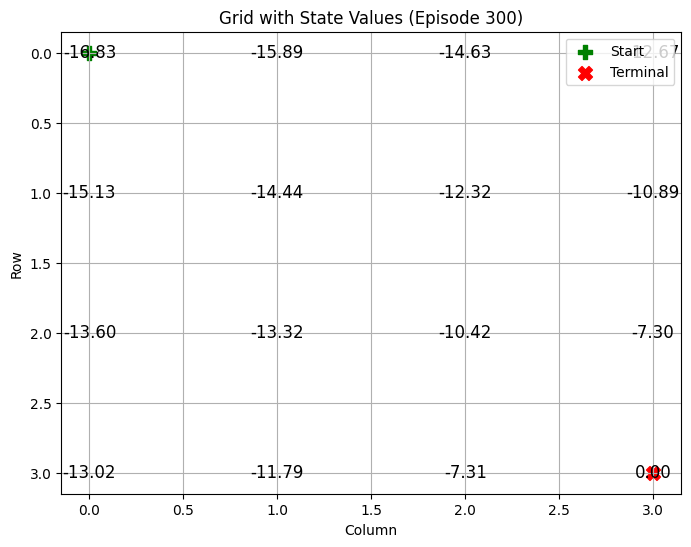

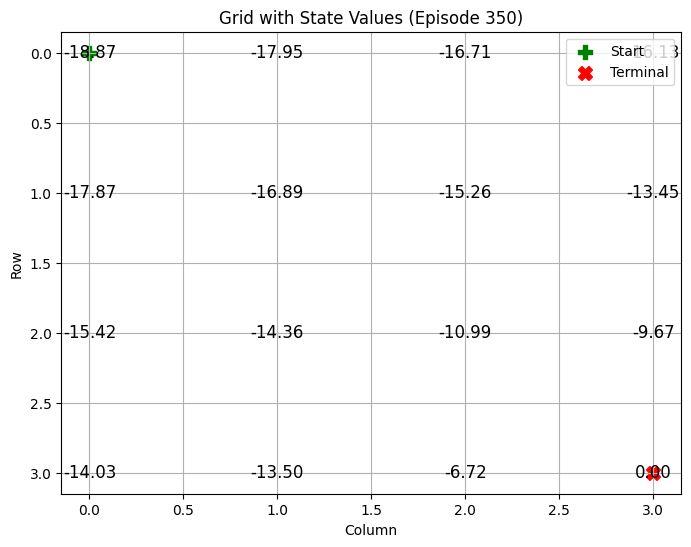

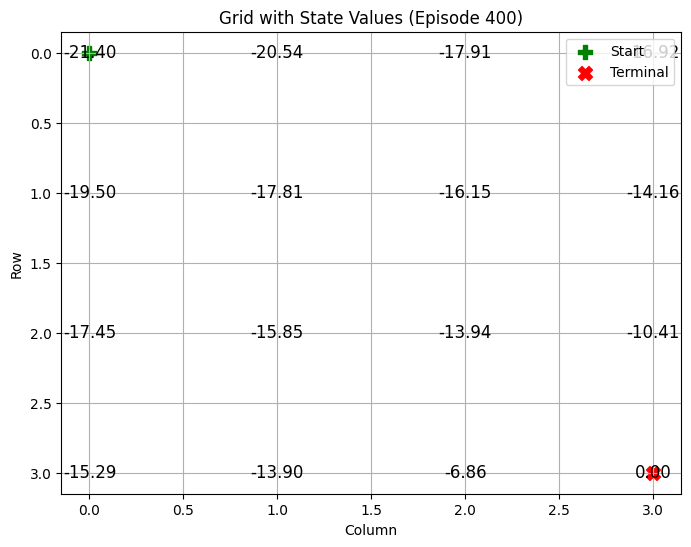

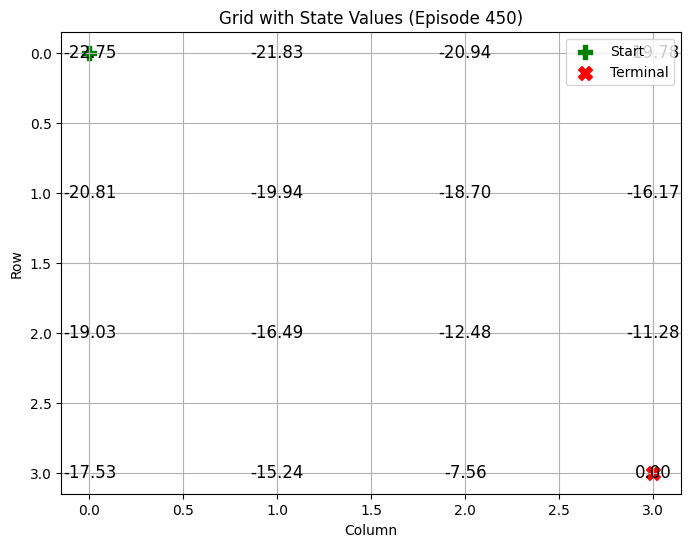

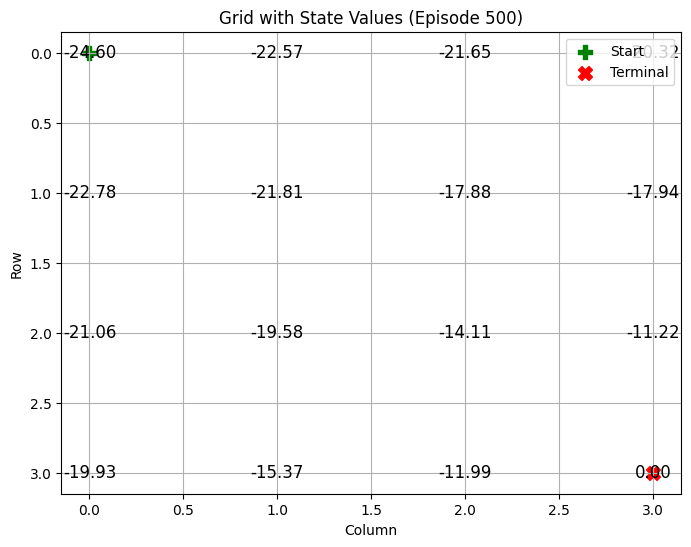

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Define GridWorld Environment (4x4 grid with rewards and terminal states)
class GridWorldEnv(gym.Env):
    def __init__(self):
        self.shape = (4, 4)  # 4x4 grid
        self.nS = np.prod(self.shape)  # Number of states
        self.nA = 4  # Actions: 0=Up, 1=Right, 2=Down, 3=Left
        self.action_space = gym.spaces.Discrete(self.nA)
        self.observation_space = gym.spaces.Discrete(self.nS)

        self.start_state = 0
        self.terminal_states = [0, 15]  # terminal states
        self.reset()

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        row, col = divmod(self.state, self.shape[1])
        if action == 0:  # Up
            row = max(row - 1, 0)
        elif action == 1:  # Right
            col = min(col + 1, self.shape[1] - 1)
        elif action == 2:  # Down
            row = min(row + 1, self.shape[0] - 1)
        elif action == 3:  # Left
            col = max(col - 1, 0)

        next_state = row * self.shape[1] + col
        reward = -1
        done = next_state in self.terminal_states
        self.state = next_state
        return next_state, reward, done, {}

# Temporal Difference (TD) Learning (Bootstrapping)
def td_learning(env, num_episodes, gamma=1.0, alpha=0.1, plot_interval=50):
    V = np.zeros(env.nS)  # Initialize state-value function
    trajectory = []  # To track agent's path
    for i_episode in range(num_episodes):
        state = env.reset()
        done = False
        episode_trajectory = []  # Track trajectory for the episode
        while not done:
            action = env.action_space.sample()
            next_state, reward, done, _ = env.step(action)

            # Update state-value function (bootstrapping step)
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

            episode_trajectory.append(state)
            state = next_state
        trajectory.append(episode_trajectory)

        # Visualize the state values after every `plot_interval` episodes
        if (i_episode + 1) % plot_interval == 0:
            plot_grid_with_values(V, shape=(4, 4), episode=i_episode + 1)
    return V, trajectory

# Trajectory Plot for Agent's Path and State-Values Visualization
def plot_grid_with_values(V, shape, episode):
    plt.figure(figsize=(8, 6))

    # Plot the grid values in each cell
    for row in range(shape[0]):
        for col in range(shape[1]):
            state = row * shape[1] + col
            value = V[state]
            plt.text(col, row, f'{value:.2f}', ha='center', va='center', fontsize=12, color='black')

    # Mark the start and terminal states
    start_row, start_col = divmod(0, shape[1])
    terminal_row, terminal_col = divmod(15, shape[1])
    plt.scatter(start_col, start_row, color='green', s=100, label="Start", marker='P')  # Green Start
    plt.scatter(terminal_col, terminal_row, color='red', s=100, label="Terminal", marker='X')  # Red Terminal

    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.title(f"Grid with State Values (Episode {episode})")
    plt.legend()
    plt.gca().invert_yaxis()  # Invert Y-axis to match grid-world layout
    plt.grid(True)
    plt.show()

# Main Execution for Bootstrapping (TD(0) Learning)
env = GridWorldEnv()
V, trajectory = td_learning(env, num_episodes=500, plot_interval=50)  # Show updates every 50 episodes


### **Inference from the Two Grid Graphs**

#### **Graph 1: Episode 50**
1. **Early Learning Phase:**
   - The state values are relatively shallow (closer to zero), suggesting the agent has just begun learning the value of different states.
   - The gradient of state values from the start to the terminal state is not very pronounced, indicating that the agent has not yet fully understood the long-term rewards or penalties associated with its decisions.

2. **Start and Terminal States:**
   - The green "+" marker represents the start state, while the red "x" marker represents the terminal state.
   - The terminal state has a value of `0.00`, as expected, since reaching the terminal state concludes the episode without any further reward/penalty accumulation.

3. **State Value Distribution:**
   - Values closer to the terminal state are less negative (more favorable), while values farther from the terminal state are more negative.
   - This distribution implies the agent is starting to learn that moving closer to the terminal state is generally better.

---

#### **Graph 2: Episode 500**
1. **Advanced Learning Phase:**
   - The state values are significantly more negative compared to Episode 50, indicating the agent has undergone more learning and now understands the penalties associated with being far from the terminal state.
   - The gradient of state values is much more pronounced, reflecting that the agent has refined its understanding of state desirability.

2. **Start and Terminal States:**
   - The terminal state still retains a value of `0.00`.
   - The start state has a highly negative value (-24.60), emphasizing that the agent recognizes the need to leave the start state quickly to minimize penalties.

3. **State Value Gradient:**
   - There is a clear progression of less negative values as the states approach the terminal state.
   - This suggests the agent has learned to estimate the cumulative rewards or penalties associated with each state effectively.

---

### **Comparison and Progression:**
1. **Improved Understanding:**
   - Over 500 episodes, the agent has shifted from a basic understanding of state values (Graph 1) to a more refined, accurate representation (Graph 2).

2. **Bootstrapping Effect:**
   - The learning process through bootstrapping is evident as the state values become more differentiated and meaningful over time.

3. **Policy Optimization:**
   - The agent is likely learning an optimal policy to minimize penalties by moving strategically toward the terminal state, as indicated by the state value progression.

---

### **Overall Summary:**
- These graphs depict the evolution of the agent's understanding of state values in a reinforcement learning environment.
- Initially, the agent has a limited understanding of the environment (Episode 50), but as learning progresses (Episode 500), the state values become more accurate, showing a clear path toward optimizing its decisions.

In [ ]:
import numpy as np
import gym
import plotly.graph_objects as go

# Define GridWorld Environment (4x4 grid with rewards and terminal states)
class GridWorldEnv(gym.Env):
    def __init__(self):
        self.shape = (4, 4)  # 4x4 grid
        self.nS = np.prod(self.shape)  # Number of states
        self.nA = 4  # Actions: 0=Up, 1=Right, 2=Down, 3=Left
        self.action_space = gym.spaces.Discrete(self.nA)
        self.observation_space = gym.spaces.Discrete(self.nS)

        self.start_state = 0
        self.terminal_states = [0, 15]  # terminal states
        self.reset()

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        row, col = divmod(self.state, self.shape[1])
        if action == 0:  # Up
            row = max(row - 1, 0)
        elif action == 1:  # Right
            col = min(col + 1, self.shape[1] - 1)
        elif action == 2:  # Down
            row = min(row + 1, self.shape[0] - 1)
        elif action == 3:  # Left
            col = max(col - 1, 0)

        next_state = row * self.shape[1] + col
        reward = -1
        done = next_state in self.terminal_states
        self.state = next_state
        return next_state, reward, done, {}

# Temporal Difference (TD) Learning (Bootstrapping)
def td_learning(env, num_episodes, gamma=1.0, alpha=0.1, plot_interval=50):
    V = np.zeros(env.nS)  # Initialize state-value function
    trajectory = []  # To track agent's path
    for i_episode in range(num_episodes):
        state = env.reset()
        done = False
        episode_trajectory = []  # Track trajectory for the episode
        while not done:
            action = env.action_space.sample()
            next_state, reward, done, _ = env.step(action)

            # Update state-value function (bootstrapping step)
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

            episode_trajectory.append(state)
            state = next_state
        trajectory.append(episode_trajectory)

        # Visualize the state values after every `plot_interval` episodes
        if (i_episode + 1) % plot_interval == 0:
            plot_3d_grid_with_values(V, shape=(4, 4), episode=i_episode + 1)
    return V, trajectory

# 3D Plotly Visualization of State Values
def plot_3d_grid_with_values(V, shape, episode):
    # Reshape the state values to match the grid shape
    grid_values = V.reshape(shape)

    # Create 3D plot
    fig = go.Figure(data=[go.Surface(
        z=grid_values,  # State values as heights
        x=np.arange(shape[1]),  # x-axis (columns)
        y=np.arange(shape[0]),  # y-axis (rows)
        colorscale='Viridis',  # Color scale
        colorbar=dict(title="State Value"),
        showscale=True
    )])

    # Add start and terminal states
    start_row, start_col = divmod(0, shape[1])
    terminal_row, terminal_col = divmod(15, shape[1])

    # Plot start state
    fig.add_trace(go.Scatter3d(
        x=[start_col], y=[start_row], z=[grid_values[start_row, start_col]],
        mode='markers', marker=dict(size=10, color='green'), name='Start State'
    ))

    # Plot terminal state
    fig.add_trace(go.Scatter3d(
        x=[terminal_col], y=[terminal_row], z=[grid_values[terminal_row, terminal_col]],
        mode='markers', marker=dict(size=10, color='red'), name='Terminal State'
    ))

    # Update layout and axes labels
    fig.update_layout(
        title=f"3D Grid with State Values (Episode {episode})",
        scene=dict(
            xaxis_title="Column",
            yaxis_title="Row",
            zaxis_title="State Value"
        ),
        width=800,
        height=800
    )

    fig.show()

# Main Execution for Bootstrapping (TD(0) Learning)
env = GridWorldEnv()
V, trajectory = td_learning(env, num_episodes=500, plot_interval=50)  # Show updates every 50 episodes


### **Inference from the 3D Grid Graphs**

These two 3D plots visualize the **state-value function** of a reinforcement learning (RL) agent at different points during training (Episode 50 and Episode 500).

---

### **Graph 1: Episode 50**
1. **Learning is Just Starting:**
   - The state values (z-axis) range between `-4.5` and `0`. The values are not deeply negative, suggesting the agent is still exploring and hasn't fully understood the environment's penalties and rewards.
   - There’s a small gradient from the start state (green marker) to the terminal state (red marker), showing that the agent is beginning to associate states closer to the terminal as better.

2. **State Value Gradient:**
   - The terminal state (red) has the highest value (`0`), as it's the goal, and the start state (green) is less favorable, with a value of about `-4.5`.

---

### **Graph 2: Episode 500**
1. **Advanced Learning:**
   - The state values now range from `-25` (start state) to `0` (terminal state), showing the agent has learned the penalties and rewards in the environment.
   - The steeper gradient indicates the agent understands the closer it gets to the terminal state, the better the reward (or lesser the penalty).

2. **State Value Gradient:**
   - The start state (green) is the least favorable (`-25`), emphasizing the agent’s learning to leave this state as quickly as possible.
   - As the agent progresses towards the terminal state (red), the values increase steadily, showing the agent's optimization to maximize rewards (or minimize penalties).

---

### **Key Insights**
1. **Learning Progression:**
   - The transition from Graph 1 to Graph 2 demonstrates how the agent refines its understanding of the environment over time, with deeper state values and a clearer gradient.

2. **Bootstrapping in Action:**
   - The agent uses past experiences to estimate state values, leading to more accurate learning as training progresses.

3. **Decision-Making Optimization:**
   - By Episode 500, the agent has likely developed a near-optimal strategy to navigate the grid effectively toward the terminal state while avoiding penalties.

---

### **Simple Summary**
At the start (Episode 50), the agent is still figuring out how good or bad each state is. By Episode 500, it has learned that moving closer to the terminal state is better, with a clear understanding of which states are more favorable and which are less so.